In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-and-salaries-in-data-field-2024/jobs_in_data_2024.csv


****Import data ****

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/kaggle/input/jobs-and-salaries-in-data-field-2024/jobs_in_data_2024.csv')

*****Show data*****

In [73]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


*****Shape define*****

In [74]:
df.shape

(14199, 12)

*****All columns name*****

In [75]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')

In [76]:
df.duplicated().sum()

5493

*****Check NULL Value*****

In [77]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

*****describe data*****

In [78]:
df.describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


*****Average Salary By Experience*****

In [79]:
salary_distribution = df['salary_in_usd']
# Visualize the distribution using a histogram or box plot

# Analyze Average Salary by Different Factors
average_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()


In [80]:
average_salary_by_experience

experience_level
Entry-level     91871.996237
Executive      192732.528846
Mid-level      124097.241090
Senior         163112.277796
Name: salary_in_usd, dtype: float64

*****Job Title and Job *****

In [81]:
df['job_title'].value_counts().reset_index()

,job_title,count
0,Data Engineer,3059
1,Data Scientist,2910
2,Data Analyst,2120
3,Machine Learning Engineer,1488
4,Research Scientist,454
...,...,...
144,Data Analytics Associate,1
145,Analytics Engineering Manager,1
146,Sales Data Analyst,1
147,AWS Data Architect,1


In [82]:
df['job_title'].value_counts().reset_index().head(40)

,job_title,count
0,Data Engineer,3059
1,Data Scientist,2910
2,Data Analyst,2120
3,Machine Learning Engineer,1488
4,Research Scientist,454
5,Analytics Engineer,390
6,Applied Scientist,369
7,Data Architect,347
8,Research Engineer,264
9,Business Intelligence Engineer,218


In [83]:
average_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean()

In [84]:
average_salary_by_job_title.reset_index().head(40)

,job_title,salary_in_usd
0,AI Architect,229721.130435
1,AI Developer,135466.789474
2,AI Engineer,164044.612903
3,AI Product Manager,141766.666667
4,AI Programmer,62347.833333
5,AI Research Engineer,92736.500000
6,AI Research Scientist,119444.000000
7,AI Scientist,111722.863636
8,AI Software Engineer,174100.000000
9,AWS Data Architect,258000.000000


In [85]:
average_salary_by_job_title.describe().reset_index()

,index,salary_in_usd
0,count,149.000000
1,mean,132760.608313
2,std,57876.670296
3,min,45000.000000
4,25%,90905.625000
5,50%,125465.500000
6,75%,159529.666667
7,max,399880.000000


In [86]:
average_salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].mean()

In [87]:
average_salary_by_employment_type.reset_index()

,employment_type,salary_in_usd
0,Contract,112007.500000
1,Freelance,51879.583333
2,Full-time,149760.663625
3,Part-time,61493.500000


*****Average salary By Employment*****

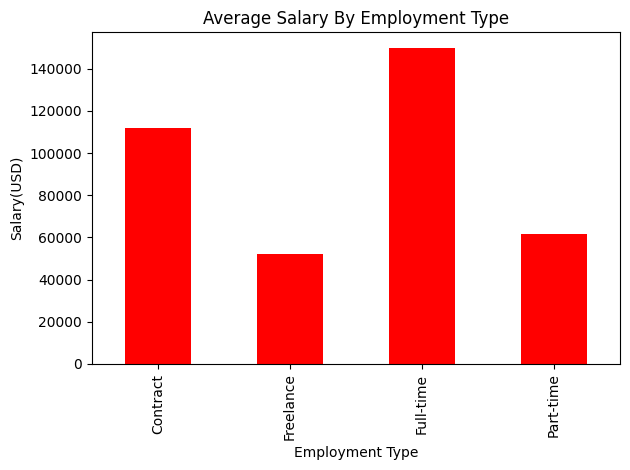

In [88]:
average_salary_by_employment_type.plot(kind='bar',color='red',linestyle='-')
plt.title('Average Salary By Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary(USD)')
plt.tight_layout()

plt.show()

In [89]:
average_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()

*****Salary by company size*****

In [90]:
average_salary_by_company_size.reset_index()

,company_size,salary_in_usd
0,L,143806.397171
1,M,150636.567038
2,S,89576.690476


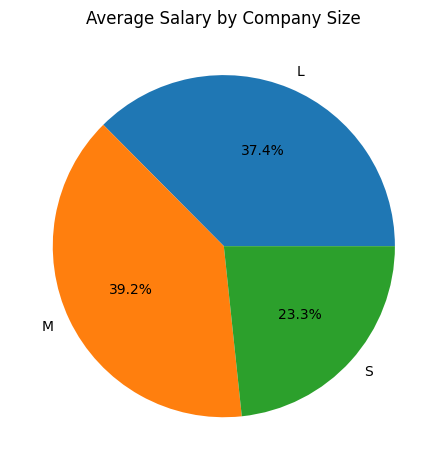

In [91]:
average_salary_by_company_size.plot(kind='pie', autopct='%1.1f%%')
plt.title('Average Salary by Company Size')
plt.ylabel('') 
plt.tight_layout()
plt.show()

In [92]:
average_salary_by_job_category = df.groupby('job_category')['salary_in_usd'].mean()

In [93]:
average_salary_by_job_category

job_category
BI and Visualization              125803.150000
Cloud and Database                142818.181818
Data Analysis                     106742.485027
Data Architecture and Modeling    156159.405728
Data Engineering                  146720.425721
Data Management and Strategy       93533.686957
Data Quality and Operations        96294.367089
Data Science and Research         162471.364064
Leadership and Management         142644.457649
Machine Learning and AI           181873.419926
Name: salary_in_usd, dtype: float64

In [94]:
average_salary = average_salary_by_job_category.reset_index()
average_salary


,job_category,salary_in_usd
0,BI and Visualization,125803.150000
1,Cloud and Database,142818.181818
2,Data Analysis,106742.485027
3,Data Architecture and Modeling,156159.405728
4,Data Engineering,146720.425721
5,Data Management and Strategy,93533.686957
6,Data Quality and Operations,96294.367089
7,Data Science and Research,162471.364064
8,Leadership and Management,142644.457649
9,Machine Learning and AI,181873.419926


In [95]:
import matplotlib.pyplot as plt

In [96]:
import seaborn as sns

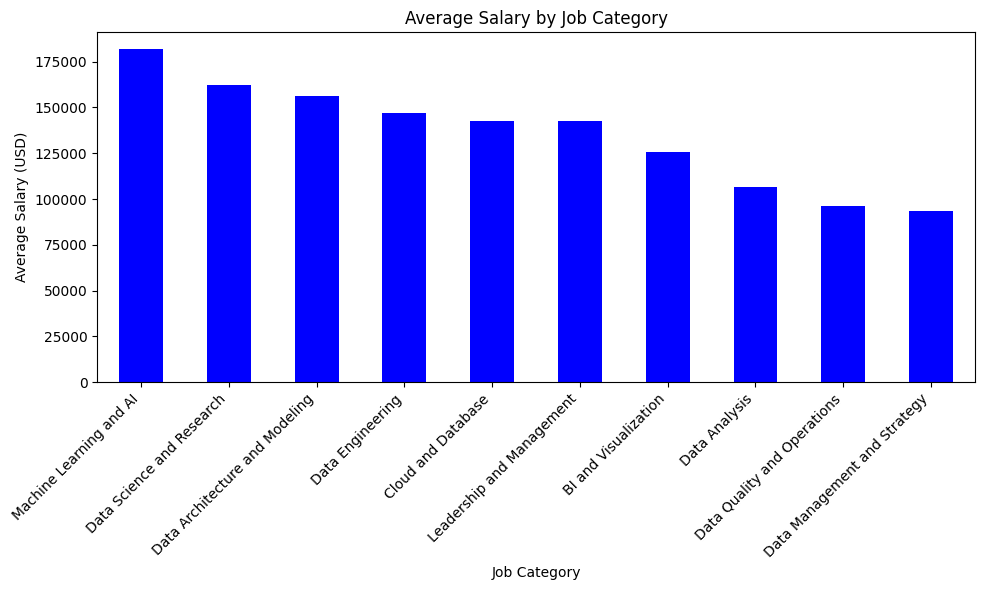

In [97]:
# Calculate average salary by job category
average_salary_by_job_categor = df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
average_salary_by_job_categor.plot(kind='bar', color='blue')
plt.title('Average Salary by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


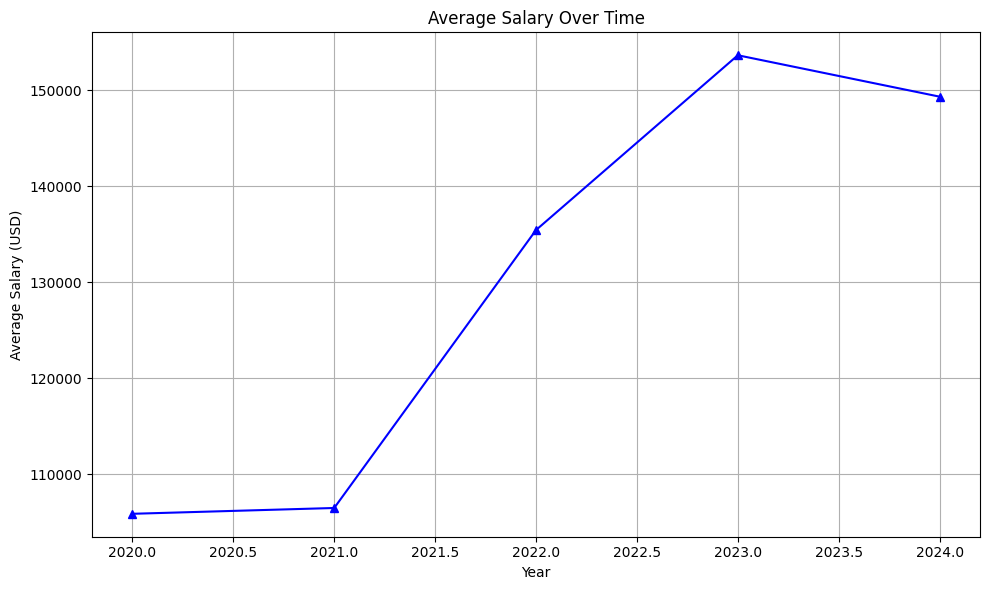

In [98]:
# Salaries Over Time
average_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

plt.figure(figsize=(10, 6))
average_salary_by_year.plot(marker='^', color='blue', linestyle='-')
plt.title('Average Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
df.groupby(['work_year', 'job_title']).size().unstack().plot(marker='o', colormap='viridis', ax=plt.gca())
plt.title('Trends in Job Titles Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')

plt.subplot(3, 1, 2)
df.groupby(['work_year', 'employment_type']).size().unstack().plot(marker='o', colormap='viridis', ax=plt.gca())
plt.title('Trends in Employment Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')

plt.subplot(3, 1, 3)
df.groupby(['work_year', 'job_category']).size().unstack().plot(marker='o', colormap='viridis', ax=plt.gca())
plt.title('Trends in Job Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')

plt.tight_layout()
plt.show()

/tmp/ipykernel_33/756413537.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


In [ ]:
plt.figure(figsize=(12, 12))


df.groupby(['work_year', 'job_title']).size().unstack().plot(marker='o', colormap='viridis', ax=plt.gca())
plt.title('Trends in Job Titles Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')

plt.subplot(3, 1, 2)
df.groupby(['work_year', 'employment_type']).size().unstack().plot(marker='o', colormap='viridis', ax=plt.gca())
plt.title('Trends in Employment Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')

plt.subplot(3, 1, 3)
df.groupby(['work_year', 'job_category']).size().unstack().plot(marker='o', colormap='viridis', ax=plt.gca())
plt.title('Trends in Job Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')

plt.tight_layout()
plt.show()

/tmp/ipykernel_33/519992528.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 2)


In [103]:
df['company_location'].value_counts().head(30)

company_location
United States         12465
United Kingdom          623
Canada                  373
Spain                   127
Germany                  96
France                   59
Australia                51
Portugal                 28
Netherlands              28
Brazil                   19
Lithuania                16
Colombia                 16
South Africa             14
Italy                    14
Latvia                   14
Greece                   14
Poland                   14
India                    13
Mexico                   13
Egypt                    13
Estonia                  12
Ireland                  12
Austria                  10
Ukraine                  10
Nigeria                   9
Argentina                 7
Russian Federation        7
New Zealand               6
Türkiye                   6
Slovenia                  6
Name: count, dtype: int64

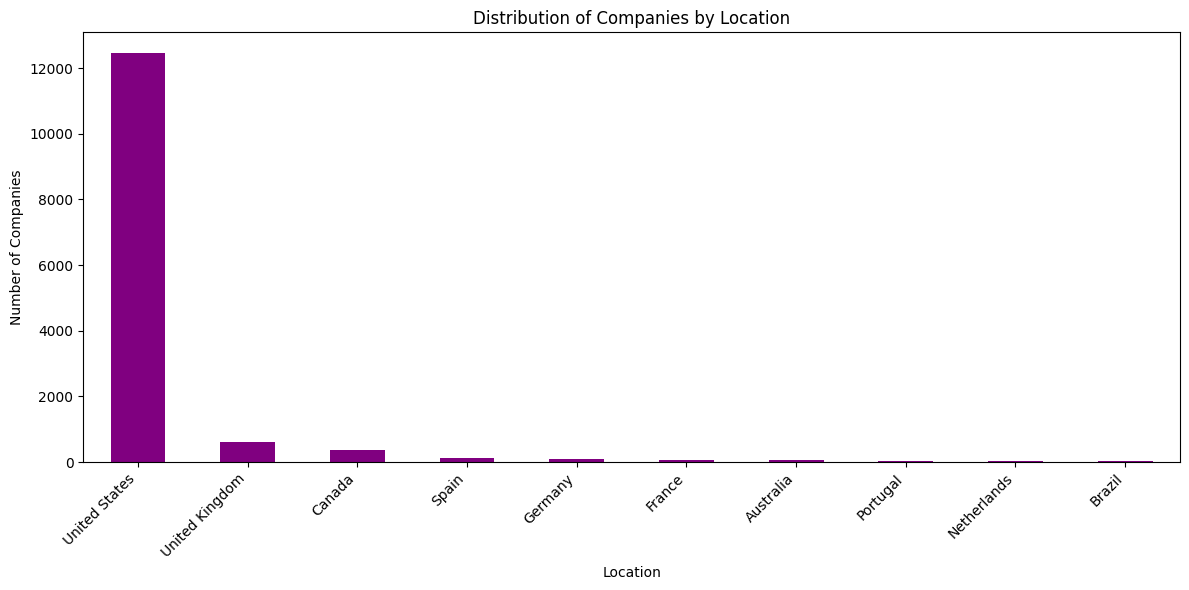

In [109]:
# Analyze Company Distribution
company_location_counts = df['company_location'].value_counts().head(10)

# Plot the distribution of companies based on their locations
plt.figure(figsize=(12, 6))
company_location_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Companies by Location')
plt.xlabel('Location')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [112]:
average_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean()
average_salary_by_location


company_location
Algeria                 100000.000000
American Samoa           38500.000000
Andorra                  50745.000000
Argentina                69571.428571
Armenia                  50000.000000
                            ...      
Ukraine                 105600.000000
United Arab Emirates     97500.000000
United Kingdom           96286.568218
United States           156525.765664
Viet Nam                 63000.000000
Name: salary_in_usd, Length: 74, dtype: float64

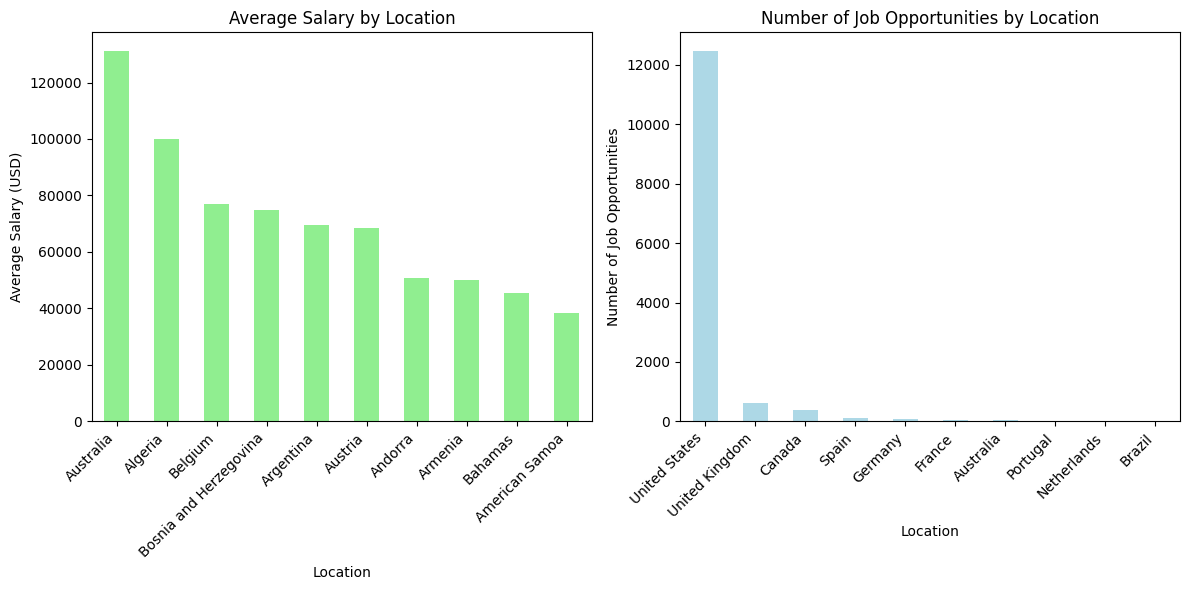

In [118]:
average_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean()
job_opportunities_by_location = df['company_location'].value_counts()

# Plotting average salary and number of job opportunities in different regions or countries
plt.figure(figsize=(12, 6))

# Plotting average salary
plt.subplot(1, 2, 1)
average_salary_by_location.head(10).sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Average Salary by Location')
plt.xlabel('Location')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')

# Plotting number of job opportunities
plt.subplot(1, 2, 2)
job_opportunities_by_location.head(10).sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Number of Job Opportunities by Location')
plt.xlabel('Location')
plt.ylabel('Number of Job Opportunities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

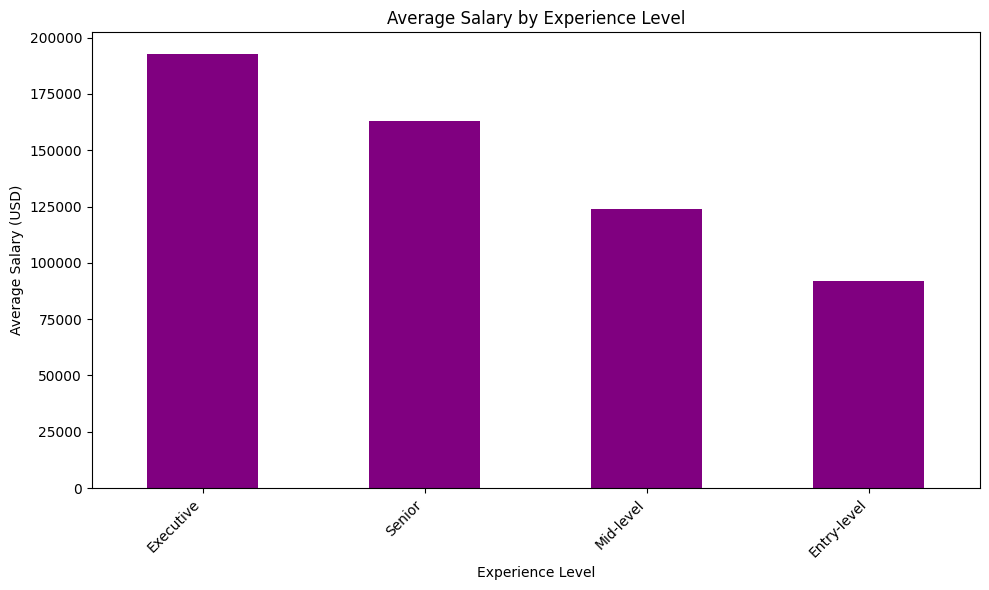

In [120]:

# Calculate average salary by experience level
average_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

# Plotting average salary variation across experience levels
plt.figure(figsize=(10, 6))
average_salary_by_experience.plot(kind='bar', color='purple')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



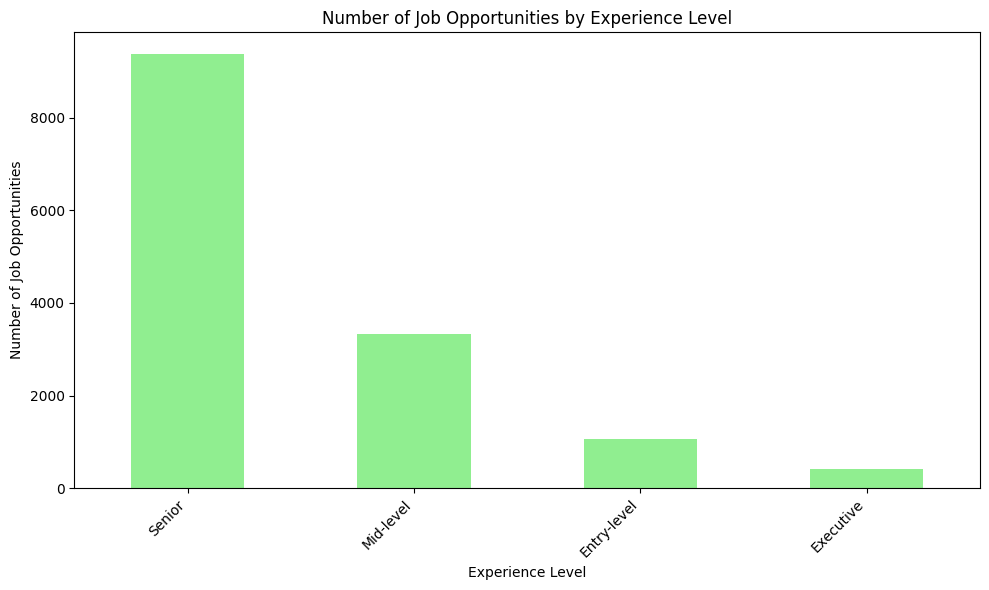

In [121]:
# Examine distribution of job openings for each experience level
job_opportunities_by_experience = df['experience_level'].value_counts()

plt.figure(figsize=(10, 6))
job_opportunities_by_experience.plot(kind='bar', color='lightgreen')
plt.title('Number of Job Opportunities by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Opportunities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

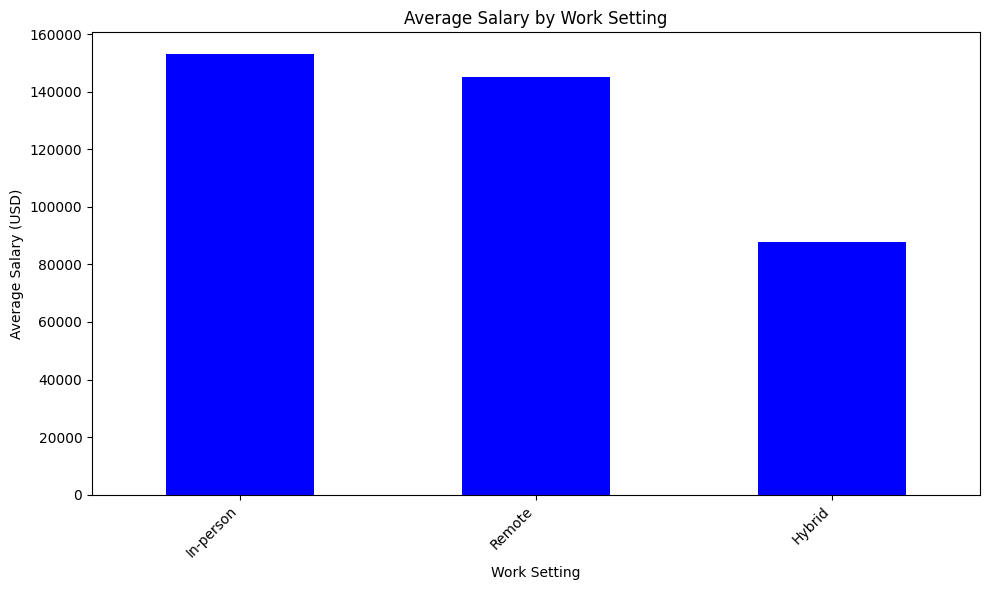

In [126]:
# Calculate average salary by work setting
average_salary_by_work_setting = df.groupby('work_setting')['salary_in_usd'].mean().sort_values(ascending=False)

# Plotting average salary variation across work settings
plt.figure(figsize=(10, 6))
average_salary_by_work_setting.plot(kind='bar', color='blue')
plt.title('Average Salary by Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [127]:
#model for prediction

In [128]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')

In [129]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


In [131]:
# # Assuming 'data' is your DataFrame and 'X' contains features
# X = df[['experience_level','employment_type','job_category','company_size','company_location']]  # Replace 'feature1', 'feature2', ... with actual feature names

# # Perform one-hot encoding on categorical variables
# X_encoded = pd.get_dummies(X, columns=['experience_level','employment_type','job_category','company_size','company_location'])  # Replace 'categorical_feature1', 'categorical_feature2', ... with actual categorical feature names

# # Now, split the encoded data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Initialize and train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, predictions)
# print("Mean Absolute Error:", mae)


Mean Absolute Error: 3149584673116.8354
